In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

# **1. Data Cleaning**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [13]:
df.sample(5)

,v1,v2
4682,ham,Ok u can take me shopping when u get paid =D
1150,ham,(That said can you text him one more time?)
3863,ham,A pure hearted person can have a wonderful smi...
1854,ham,They did't play one day last year know even th...
1577,ham,Remember all those whom i hurt during days of ...


In [15]:
# rename columns
df.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace=True)
df.sample(5)

,label,text
748,ham,Is there a reason we've not spoken this year? ...
2289,spam,Had your mobile 11mths ? Update for FREE to Or...
4036,ham,Dont flatter yourself... Tell that man of mine...
3723,spam,"Hi there, 2nights ur lucky night! Uve been inv..."
418,ham,"Alright, I'll head out in a few minutes, text ..."


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['label'] = encoder.fit_transform(df['label'])
df.sample(5)

,label,text
799,0,"\Gimme a few\"" was &lt;#&gt; minutes ago"""
1226,1,Reply with your name and address and YOU WILL ...
5522,0,Thats cool. I want to please you...
2167,0,Yes.he have good crickiting mind
802,1,FREE for 1st week! No1 Nokia tone 4 ur mobile ...


In [20]:
# check missing value
df.isnull().sum()

label    0
text     0
dtype: int64

In [21]:
# check duplicate values
df.duplicated().sum()

np.int64(403)

In [23]:
# remove duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [24]:
df.shape

(5169, 2)

# **2. EDA**

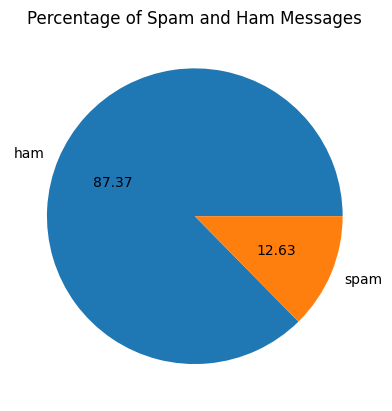

In [89]:
# check percentage of spam and ham
df['label'].value_counts()
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.title('Percentage of Spam and Ham Messages')
plt.show()

In [44]:
import nltk

# download punkt tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\redow\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [41]:
# count number of characters in each text
df['num_char'] = df['text'].apply(len)

In [42]:
df.sample(5)

,label,text,num_char
1264,0,I will see in half an hour,26
2872,0,I dont understand your message.,31
40,0,Pls go ahead with watts. I just wanted to be s...,82
1603,0,Have you heard about that job? I'm going to th...,143
759,0,"Call me when you/carlos is/are here, my phone'...",95


In [47]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [48]:
df.head()

,label,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [53]:
# count number of sentences in each text
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [57]:
df.head()

,label,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
df[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
# for ham description
df[df['label'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
# for spam description
df[df['label'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


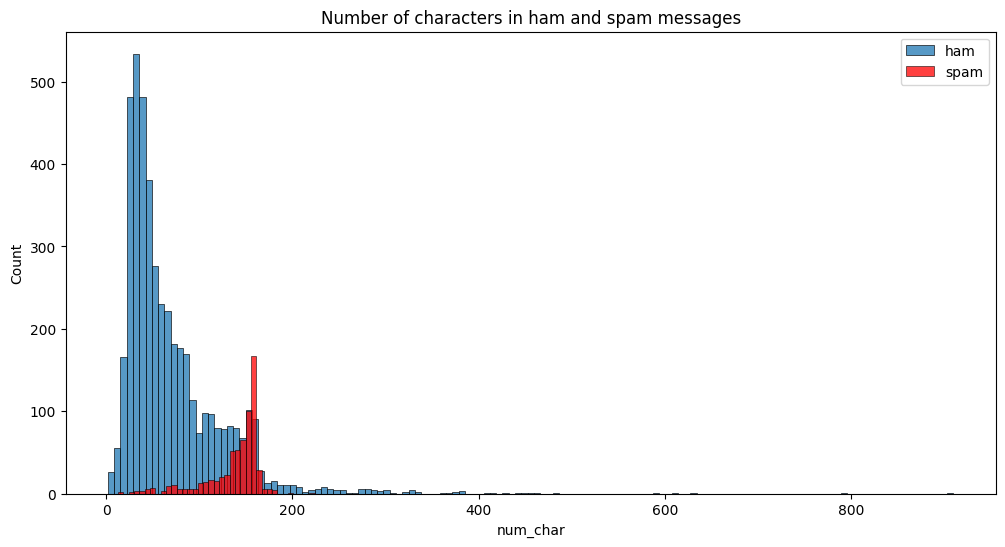

In [77]:
# visualize number of characters in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of characters in ham and spam messages')
plt.show()

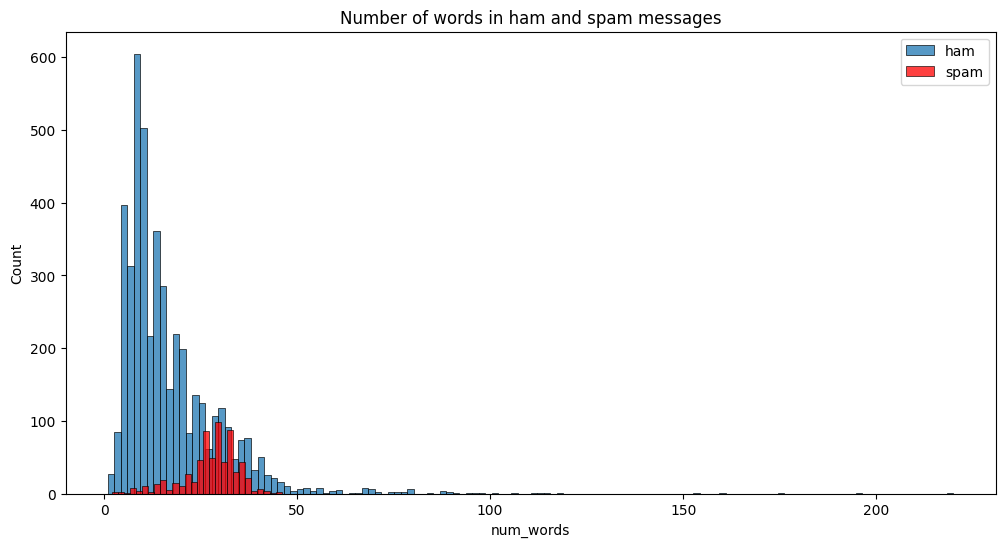

In [78]:
# visualize number of words in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of words in ham and spam messages')
plt.show()

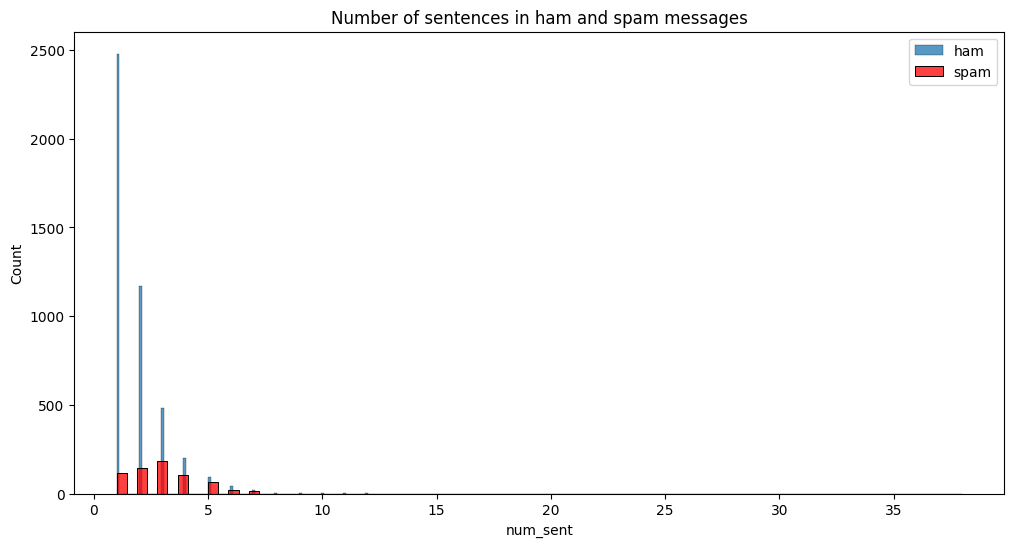

In [81]:
# visualize number of sentences in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_sent'])
sns.histplot(df[df['label'] == 1]['num_sent'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of sentences in ham and spam messages')
plt.show()

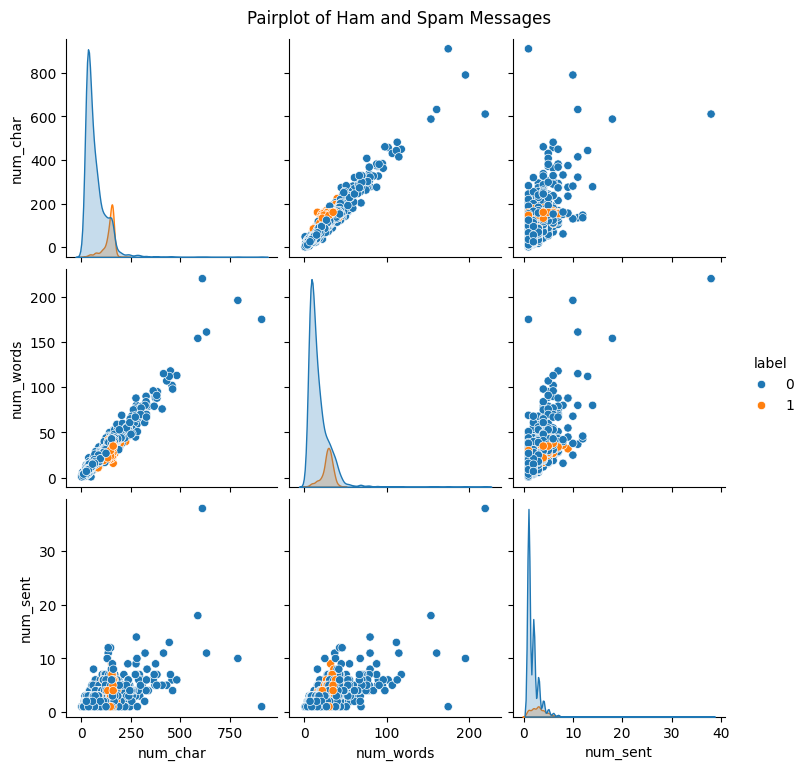

In [96]:
# visualize the relationship between number of characters, words, and sentences
sns.pairplot(df, hue='label')
plt.suptitle('Pairplot of Ham and Spam Messages', y=1.02)
plt.show()

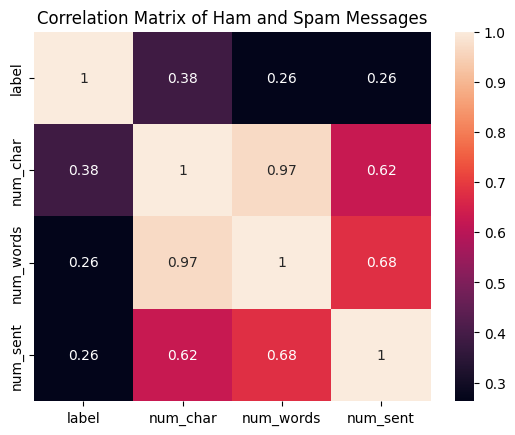

In [97]:
# Compute correlation matrix excluding the 'text' column
df_corr = df.drop(columns=['text']).corr()
sns.heatmap(df_corr, annot= True)
plt.title('Correlation Matrix of Ham and Spam Messages')
plt.show()

## **Findings:😁**

1. **Correlation Analysis:**
    - The `label` column has a moderate positive correlation with `num_char` (0.3847), indicating that spam messages tend to have more characters.
    - The `num_char` and `num_words` columns are highly correlated (0.9658), suggesting that longer messages generally contain more words.
    - The `num_sent` column has a moderate correlation with both `num_char` (0.6241) and `num_words` (0.6800), indicating that messages with more sentences also tend to have more characters and words.

2. **Imbalance in Data:**
    - The dataset is imbalanced, with significantly more ham messages than spam messages.

3. **Text Characteristics:**
    - Spam messages generally have more characters, words, and sentences compared to ham messages, as observed in the descriptive statistics and visualizations.

# **3. Data preprocessing**
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming